In [4]:
import sys 
import os

#BaM Stuff
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh
import numpy as np

import cymetric as cym
import pandas as pd

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

In [5]:
flow = cyh.MakeFlowGraph("ref/0.h5")

RuntimeError: basic_string

In [6]:
flow.body = list(set(flow.body))
flow.body

NameError: name 'flow' is not defined

In [7]:
for node in flow.body:
    if "deployer" in node:
        flow.body.remove(node)
    if "str_lwr_b" in node:
        flow.body.remove(node)
    if "cool_lwr_b" in node:
        flow.body.remove(node)
    if "init" in node:
        flow.body.remove(node)
    if "src_u_nat" in node:
        flow.body.remove(node)
    if "str_ru" in node:
        flow.body.remove(node)




        

NameError: name 'flow' is not defined

In [8]:
flow

NameError: name 'flow' is not defined

In [9]:
flow.render("flow.png")

NameError: name 'flow' is not defined

In [12]:
db = cym.dbopen("ref/2.h5")
ev = cym.Evaluator(db=db, write=False)

In [13]:
dfp = tm.get_power(ev)
dfp['Time'] *= 1/12.
dfp['Value'] *= 1/1000.
dfp.columns = ['Time', 'Fleet']


dfp_lwr = tm.get_power(ev, facilities=['lwr_a', 'lwr_b'])
dfp_lwr['Time'] *= 1/12.
dfp_lwr['Value'] *= 1/1000.
dfp_lwr.columns = ['Time', 'LWR']


dfp_fbr_a = tm.get_power(ev, facilities=['sfr_a'])
dfp_fbr_a['Time'] *= 1/12.
dfp_fbr_a['Value'] *= 1/1000.
dfp_fbr_a.columns = ['Time', 'SFR-A']



dfp_fbr_b = tm.get_power(ev, facilities=['sfr_b'])
dfp_fbr_b['Time'] *= 1/12.
dfp_fbr_b['Value'] *= 1/1000.
dfp_fbr_b.columns = ['Time', 'SFR-B']





/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:226: UserWarning: no faciity provided
  warnings.warn(wng_msg, UserWarning)


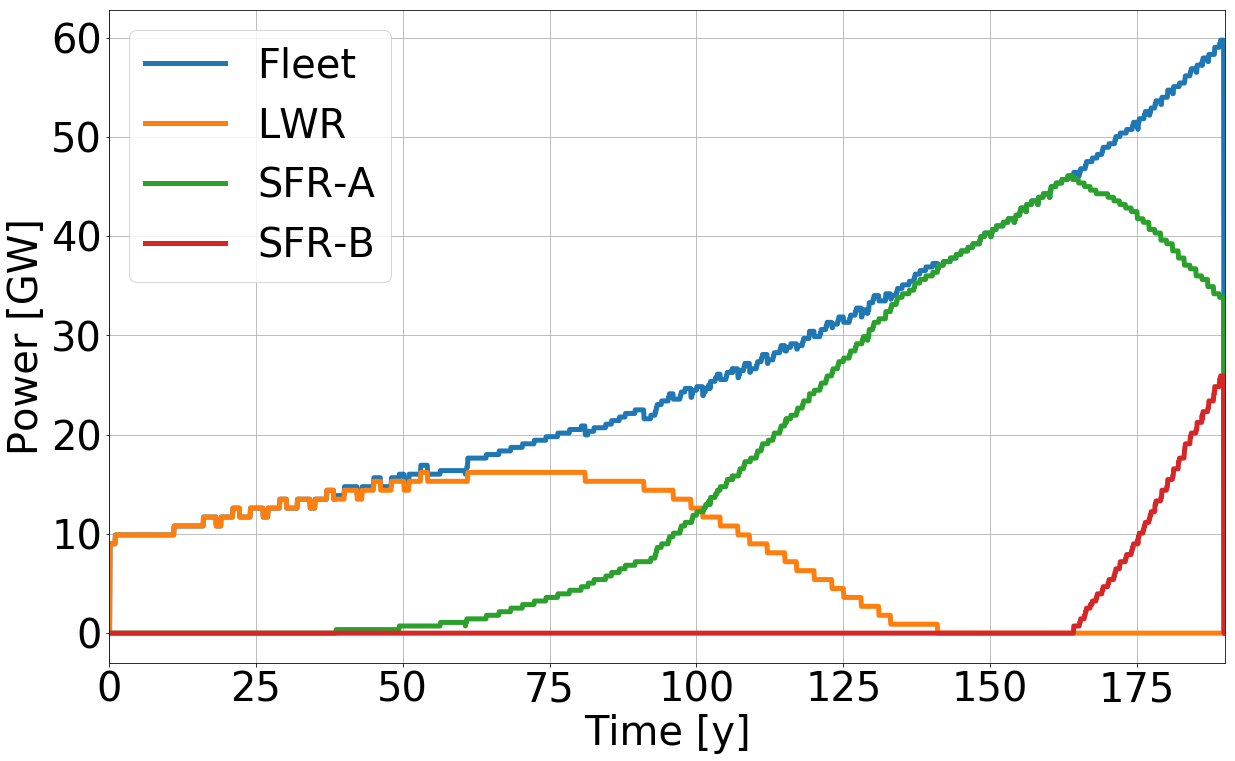

In [14]:
linewdth = 5
font_size = 40

ax = dfp.plot('Time','Fleet',figsize = (20,12),linewidth=linewdth)
dfp_lwr.plot('Time','LWR', linewidth=linewdth, ax=ax)
dfp_fbr_a.plot('Time','SFR-A', linewidth=linewdth, ax=ax)
dfp_fbr_b.plot('Time','SFR-B', linewidth=linewdth, ax=ax)
ax.grid(which='both')


plt.xlim([0,190])
plt.xlabel('Time [y]')
plt.ylabel('Power [GW]')
plt.legend(prop={'size':font_size})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(font_size)
plt.savefig('power.png', dpi=80)


/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:226: UserWarning: no faciity provided
  warnings.warn(wng_msg, UserWarning)


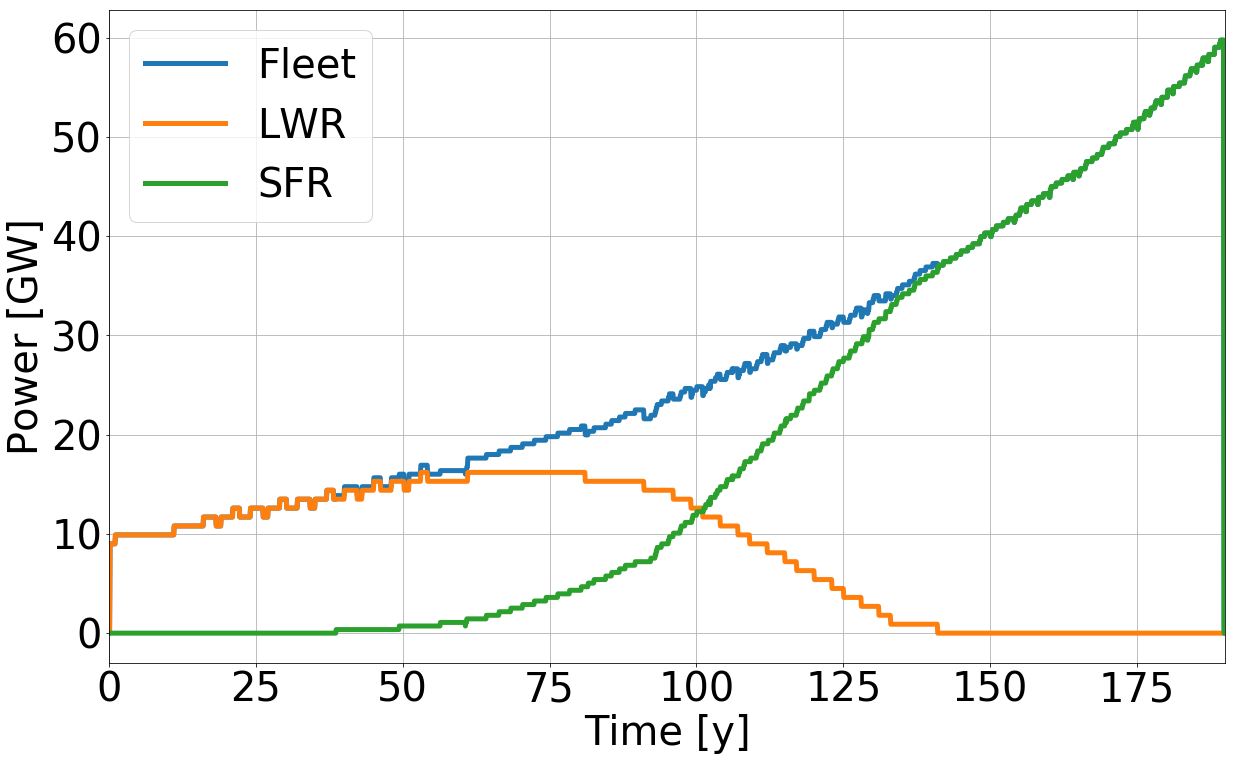

In [16]:
dfp = tm.get_power(ev)
dfp['Time'] *= 1/12.
dfp['Value'] *= 1/1000.
dfp.columns = ['Time', 'Fleet']


dfp_lwr = tm.get_power(ev, facilities=['lwr_a', 'lwr_b'])
dfp_lwr['Time'] *= 1/12.
dfp_lwr['Value'] *= 1/1000.
dfp_lwr.columns = ['Time', 'LWR']


dfp_fbr_a = tm.get_power(ev, facilities=['sfr_a', 'sfr_b'])
dfp_fbr_a['Time'] *= 1/12.
dfp_fbr_a['Value'] *= 1/1000.
dfp_fbr_a.columns = ['Time', 'SFR']






linewdth = 5
font_size = 40

ax = dfp.plot('Time','Fleet',figsize = (20,12),linewidth=linewdth)
dfp_lwr.plot('Time','LWR', linewidth=linewdth, ax=ax)
dfp_fbr_a.plot('Time','SFR', linewidth=linewdth, ax=ax)
ax.grid(which='both')

plt.xlim([0,190])
plt.xlabel('Time [y]')
plt.ylabel('Power [GW]')
plt.legend(prop={'size':font_size})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(font_size)
plt.savefig('power.png', dpi=80)



In [36]:
fac = ['str_lwr_a', 'str_sfr_b', 'str_sfr_a']
nucs = ()
coms = ()


df3 = tm.inventories(ev, facilities=fac)
df3['Time'] *= 1/12.
df3['Quantity'] *= 1/1000.

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:133: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


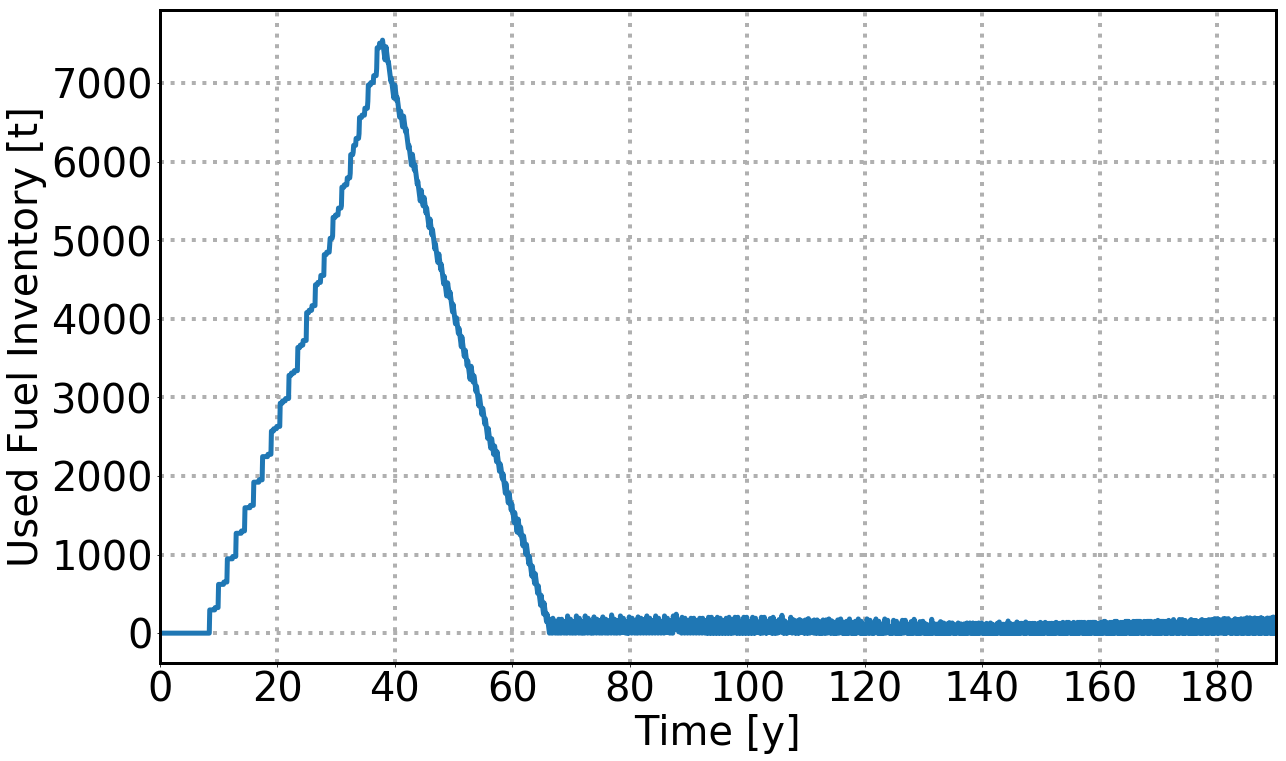

In [37]:
plt.rcParams['axes.linewidth'] = 3



linewdth = 5
font_size = 40

df3_y_m = df3
ax = df3_y_m.plot('Time','Quantity',figsize = (20,12),linewidth=linewdth)
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
major_x_ticks = np.arange(0, 200, 20)
ax.set_xticks(major_x_ticks)


# And a corresponding grid
ax.grid(which='both',linestyle=':', linewidth=4)

plt.xlim([0,190])
plt.xlabel('Time [y]')
plt.ylabel('Used Fuel Inventory [t]')
#plt.legend(prop={'size':font_size})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(font_size)
plt.legend().set_visible(False)

plt.savefig('used_fuel.png', dpi=80)

In [38]:
sfr_frac

NameError: name 'sfr_frac' is not defined

In [ ]:
ax = sfr_frac.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))

In [ ]:
rec = ['fab_sfr']
send = ['str_pu']
nucs = ()
coms = ()


df3_ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)



In [ ]:
ax = df3_.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [ ]:
rec = ['str_pu']
send = ()
nucs = ()
coms = ()


df3_ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)

ax = df3_.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()


In [ ]:
df3_['Mass'].sum()

In [ ]:
send = ['lwr_a']
rec = ()
nucs = ['U235']
coms = ()


df3__ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)
df3_tot = tm.transactions(ev, receivers=rec, senders=send, commodities=coms)

df3__['Mass'] *= 1./df3_tot['Mass']

ax = df3__.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [ ]:
send = ['fab_sfr']
rec = ()
nucs = ['Pu238','Pu239','Pu240','Pu241','Pu242']
coms = ()


df3__ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)
df3_tot = tm.transactions(ev, receivers=rec, senders=send, commodities=coms)

df3__['Mass'] *= 1./df3_tot['Mass']

ax = df3__.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [ ]:
df3_tot['Mass'].sum()

In [ ]:
dfp = tm.get_power(ev, facilities=["sfr_a","sfr_b"])
dfp.plot('Time','Value',figsize = (20,12))

In [ ]:
fac = ['fab_sfr']
nucs = ['Pu238','Pu239','Pu240','Pu241','Pu242']
coms = ()


df3 = tm.inventories(ev, facilities=fac, nucs=nucs)


df3_y_m = df3
ax = df3_y_m.plot('Time','Quantity',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [ ]:
send = ['fab_sfr']
rec = ()
nucs = ['Pu238','Pu239','Pu240','Pu241','Pu242']
coms = ()


df3__ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)
df3_tot = tm.transactions(ev, receivers=rec, senders=send, commodities=coms)

#df3__['Mass'] *= 1./df3_tot['Mass']

ax = df3__.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [ ]:
df3__.sum()

1.558190e+06\s1

In [ ]:
df3_y_m

In [ ]:
dfp = tm.get_power(ev)
dfp['Time'] *= 1/12.
dfp['Value'] *= 1/1000.
dfp.columns = ['Time', 'Fleet']


dfp_lwr = tm.get_power(ev, facilities=['lwr_a', 'lwr_b'])
dfp_lwr['Time'] *= 1/12.
dfp_lwr['Value'] *= 1/1000.
dfp_lwr.columns = ['Time', 'LWR']


dfp_fbr_a = tm.get_power(ev, facilities=['sfr_a', 'sfr_b'])
dfp_fbr_a['Time'] *= 1/12.
dfp_fbr_a['Value'] *= 1/1000.
dfp_fbr_a.columns = ['Time', 'SFR']





linewdth = 5
font_size = 40

ax = dfp_lwr.plot('Time','LWR',figsize = (20,12),linewidth=linewdth, color='C1')
#dfp_lwr.plot('Time','LWR', linewidth=linewdth, ax=ax)
#dfp_fbr_a.plot('Time','SFR', linewidth=linewdth, ax=ax)
plt.xlim([0,190])
plt.ylim([0,60])

plt.xlabel('Time [y]')
plt.ylabel('Power [GW]')
plt.legend(prop={'size':font_size})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(font_size)
plt.savefig('power_lwr.png', dpi=80)


